In [7]:
import hopsworks
import os

In [79]:
project = hopsworks.login(api_key_value=os.environ.get("HOPSWORKS_KEY"))
fs = project.get_feature_store(name="portuguese_lyrics_featurestore")

data = fs.get_feature_group("lyrics", version=1).read()
data

2025-01-09 12:59:23,862 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-01-09 12:59:23,872 INFO: Initializing external client
2025-01-09 12:59:23,875 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-01-09 12:59:25,543 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1207500
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.84s) 


,title,artist,genre,lyrics,id
0,Final de Tarde,Péricles,Pagode,Eu não tô legal Essa noite quase não dormi Tá ...,866
1,The Lazy Song,Bruno Mars,R&B,Hoje eu não estou com vontade de fazer nada Só...,1056
2,Deixa Tudo Como Tá,Thiaguinho,Pagode,Deixa tudo como tá Eu não poderia tá feliz ass...,848
3,Pink Skies,Zach Bryan,Country,As crianças estão na cidade para um funeral Po...,21
4,Na Linha do Tempo,Victor e Leo,Sertanejo,"Eu te dei o ouro do Sol, a prata da Lua Te dei...",1420
...,...,...,...,...,...
1495,Dingo Bell (part. MC Fabinho da Osk e DJ do Cr...,MC Jessica do Escadão,Funk,Já que o Natal tá em cima Vamo mandar essa daq...,239
1496,Tareco & Mariola,Flávio José,Forró,Eu não preciso de você O mundo é grande e o de...,171
1497,Interessante,Ferrugem,Pagode,"Eu nunca fui um cara interessante Mas, você me...",874
1498,APT. (feat. ROSÉ),Bruno Mars,R&B,O jogo aleatório que a Chaeyoung gosta Jogo al...,1096


In [80]:
import nltk

nltk.download("stopwords")
stopwords = set(nltk.corpus.stopwords.words("portuguese"))
f"{len(stopwords)} stopwords em português"

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'207 stopwords em português'

In [81]:
data["lyrics"]

0       Eu não tô legal Essa noite quase não dormi Tá ...
1       Hoje eu não estou com vontade de fazer nada Só...
2       Deixa tudo como tá Eu não poderia tá feliz ass...
3       As crianças estão na cidade para um funeral Po...
4       Eu te dei o ouro do Sol, a prata da Lua Te dei...
                              ...                        
1495    Já que o Natal tá em cima Vamo mandar essa daq...
1496    Eu não preciso de você O mundo é grande e o de...
1497    Eu nunca fui um cara interessante Mas, você me...
1498    O jogo aleatório que a Chaeyoung gosta Jogo al...
1499    Desde menor que eu cresci Formei na boca Dispo...
Name: lyrics, Length: 1500, dtype: object

In [91]:
import re
from unidecode import unidecode

def clean_text(text):
    # To lowercase
    text = text.lower()
    # Normalize
    text = unidecode(text)
    # Remove ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    return " ".join([word for word in text.split() if word not in stopwords])


data["clean_lyrics"] = data["lyrics"].apply(lambda x: clean_text(x))
data["clean_lyrics"]

0       nao to legal noite quase nao dormi ta custando...
1       hoje nao vontade fazer nada so quero ficar dei...
2       deixa tudo ta nao poderia ta feliz assim so po...
3       criancas estao cidade funeral arrume carro seq...
4       dei ouro sol prata lua dei estrelas pra desenh...
                              ...                        
1495    ja natal ta cima vamo mandar daqui chegou nata...
1496    nao preciso voce mundo grande destino espera n...
1497    nunca cara interessante voce olhou instante de...
1498    jogo aleatorio chaeyoung gosta jogo aleatorio ...
1499    desde menor cresci formei boca disposicao mule...
Name: clean_lyrics, Length: 1500, dtype: object

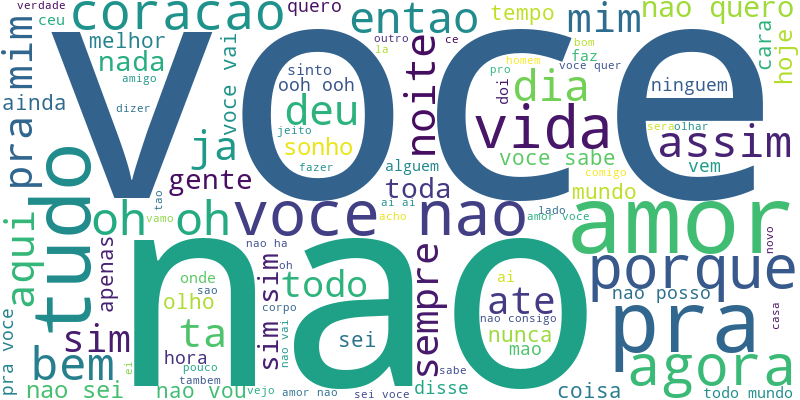

In [92]:
import wordcloud

wc = wordcloud.WordCloud(width=800, height=400, max_words=100, background_color="white")
wc.generate(" ".join(data["clean_lyrics"]))
wc.to_image()

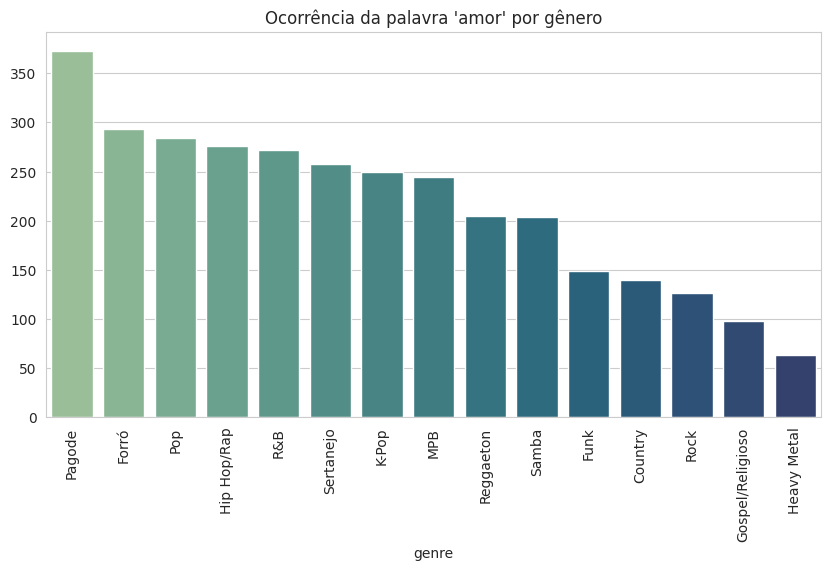

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


def plot_word_occurrence(word):
    grouped = data.groupby("genre")["clean_lyrics"].apply(lambda x: " ".join(x))
    word_count = grouped.apply(lambda x: x.count(word)).sort_values(ascending=False)

    plt.figure(figsize=(10, 5))
    plt.title(f"Ocorrência da palavra '{word}' por gênero")
    sns.barplot(
        x=word_count.index,
        y=word_count.values,
        palette="crest",
        hue=word_count.index,
        legend=False,
    )
    plt.xticks(rotation=90)
    plt.show()


plot_word_occurrence("amor")

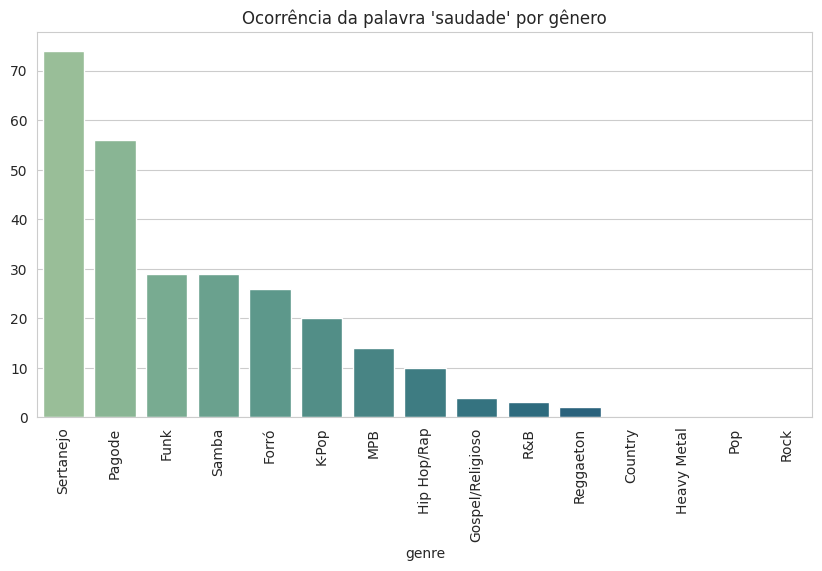

In [94]:
plot_word_occurrence("saudade")

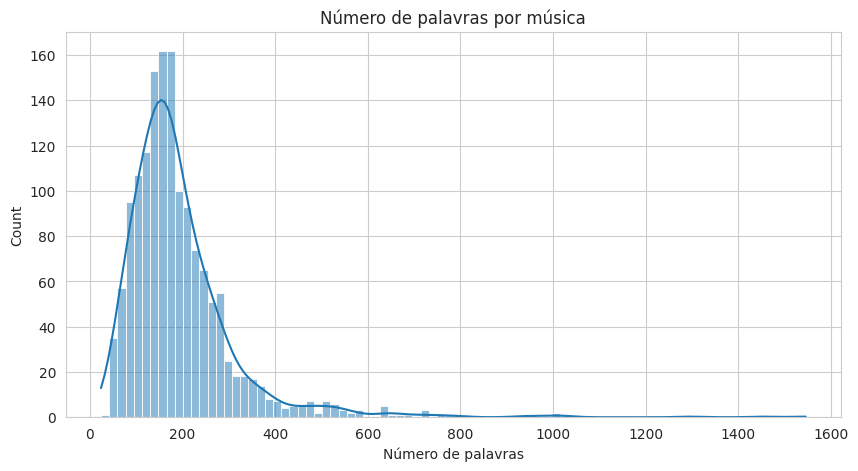

In [132]:
plt.figure(figsize=(10, 5))
plt.title("Número de palavras por música")
sns.histplot(x=data["clean_lyrics"].apply(lambda x: len(x.split())), kde=True)
plt.xlabel("Número de palavras")
plt.show()

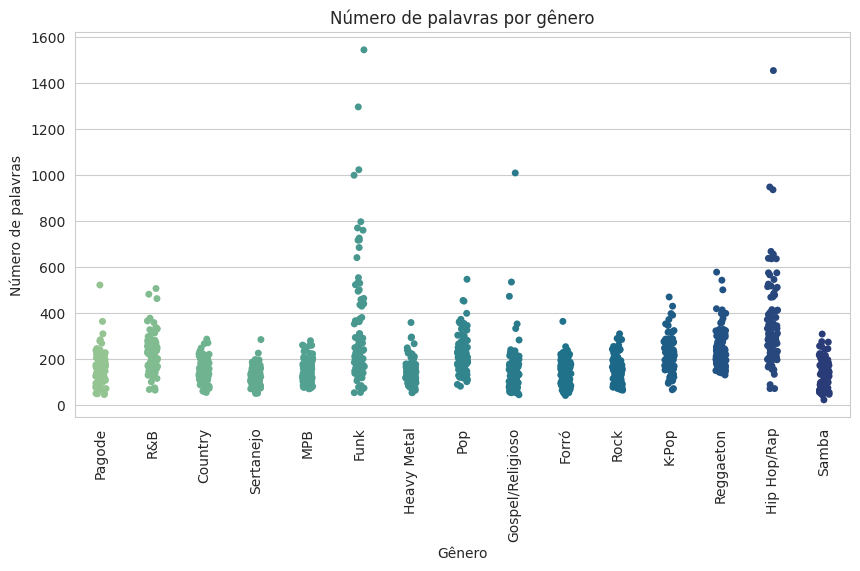

In [168]:
wordcount = data["clean_lyrics"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
plt.title("Número de palavras por gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de palavras")
sns.stripplot(x=data["genre"], y=wordcount, palette="crest", hue=data["genre"])
plt.xticks(rotation=90)
plt.show()